# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Reading csv

In [3]:
airbnb_data = pd.read_csv('AB_NYC_2019.csv')

print(airbnb_data.shape)

(48895, 16)


In [4]:
# checking the data types

airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# checking the statistical info

airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Average availability for Airbnb is ~113 days
#### Average prie for an Airbnb is ~153$

# Handling Missing values 

In [6]:
# Checking the null values

(100*(airbnb_data.isnull().sum())/len(airbnb_data.index))

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

### name, host_name, last_review , reviews_per_month columns have missing values which we need to impute

In [7]:
# filtering column names having missing values
L1 = []
for i in airbnb_data.columns:
    if (100*(airbnb_data[i].isnull().sum())/len(airbnb_data.index)):
        L1.append(i)

L1

['name', 'host_name', 'last_review', 'reviews_per_month']

In [8]:
#checking the null values in for name column

df1 = airbnb_data[airbnb_data['name'].isnull()]
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,08-06-2015,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,01-01-2015,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,02-01-2016,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,05-01-2016,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [9]:
# As we don't have the name of the listing we will be filling the null values with "Not available" 

airbnb_data['name'].fillna('Not available', inplace=True)

In [10]:
# checking if the null values have been imputed
# No missing values found

airbnb_data['name'].isnull().sum()

0

In [11]:
# As we don't have the name of the host we will be filling the null values with "Not available" 

airbnb_data['host_name'].fillna('Not available', inplace=True)

In [12]:
# checking if the null values have been imputed
# No missing values found

airbnb_data['host_name'].isnull().sum()

0

In [13]:
# We can't impute the missing values for last_review column as the customer might not have given the rating so we can impute with blanks meaning no information available
mode_last_review=np.min(airbnb_data[~airbnb_data['last_review'].isna()]['last_review'])
airbnb_data['last_review'].fillna(mode_last_review, inplace=True)

In [14]:
# checking if the null values have been imputed
# No missing values found

airbnb_data['last_review'].isnull().sum()

0

In [15]:
# As we can see that if number of reviews are 0 then review per month will also be 0 so imputing 'reviews_per_month' as 0

airbnb_data['reviews_per_month'].fillna(0, inplace=True)

In [16]:
# checking if the null values have been imputed
# No missing values found

airbnb_data['reviews_per_month'].isnull().sum()

0

In [17]:
# checking the null values in complete data after imputing the values


(100*(airbnb_data.isnull().sum())/len(airbnb_data.index))

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

### Imputed all the missing values

## Visualizations

In [51]:
airbnb_data.host_id.value_counts().iloc[:5]

107434423    224
30283594     117
137358866    103
12243051      96
16098958      96
Name: host_id, dtype: int64

#### host_id 219517861 has maximum number of bookings 

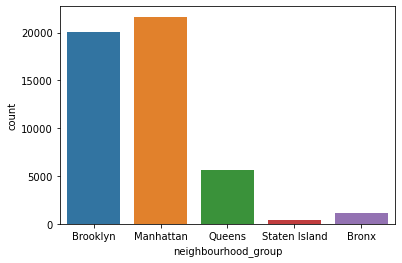

In [19]:
# checking which neighbourhood more bookings

sns.countplot(x=airbnb_data['neighbourhood_group'])
plt.show()

#### Manhattan city has more no. of transactions whereas Staten Island and Bronx have very less transactions

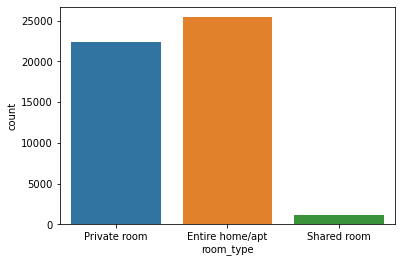

In [20]:
# checking which room type

sns.countplot(x=airbnb_data['room_type'])
plt.show()

#### Room type 'Entire home/apt' has more number of transactions as compared to private room and shared room
#### Shared room has least number of transactions/bookings

In [21]:
# checking most preferred neighbourhood
df3= airbnb_data['neighbourhood'].value_counts().iloc[:5]
df3

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

#### Williamsburg neighbourhood is the most preferred neighbourhood which has maximum number of bookings

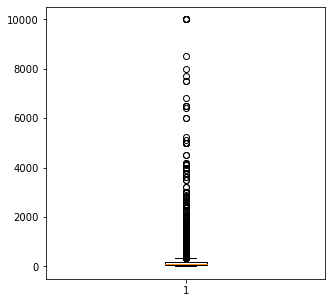

In [22]:
# checking the min max price of airbnb

plt.figure(figsize=(5,5))
plt.boxplot(airbnb_data['price'])
plt.show()

# To be continued

In [31]:
outlier_Ananlysis=airbnb_data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].quantile(q=[0.25, 0.5,0.75,0.95,0.99])

In [32]:
outlier_Ananlysis

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0.25,69.0,1.0,1.0,0.04,1.0,0.0
0.50,106.0,3.0,5.0,0.37,1.0,45.0
0.75,175.0,5.0,24.0,1.58,2.0,227.0
0.95,355.0,30.0,114.0,4.31,15.0,359.0
0.99,799.0,45.0,214.0,6.80,232.0,365.0


##### We can take 99percentile as cutt off and remove the Outliers.

In [47]:
for i in outlier_Ananlysis.columns:
    print(outlier_Ananlysis[i][0.99])
    airbnb_data=airbnb_data[airbnb_data[i]<=outlier_Ananlysis[i][0.99]]

799.0
45.0
214.0
6.8
232.0
365.0


In [48]:
airbnb_data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,46751.000000,46751.000000,46751.000000,46751.000000,46751.000000,46751.000000
mean,137.272144,5.763192,20.689269,0.997857,5.033176,109.046630
std,103.772163,8.436480,35.689302,1.347097,20.100660,130.371889
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,105.000000,3.000000,5.000000,0.360000,1.000000,38.000000
75%,175.000000,5.000000,23.000000,1.490000,2.000000,215.000000
max,799.000000,45.000000,214.000000,6.800000,232.000000,365.000000


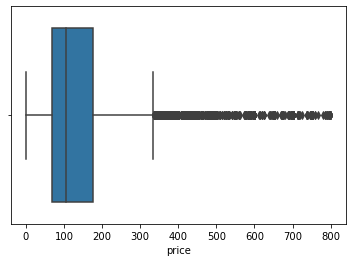

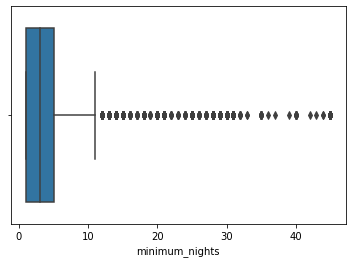

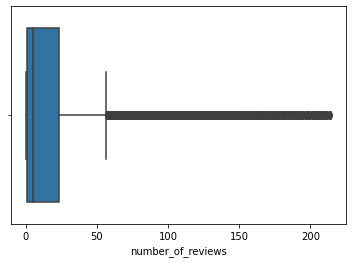

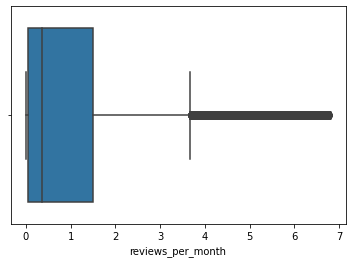

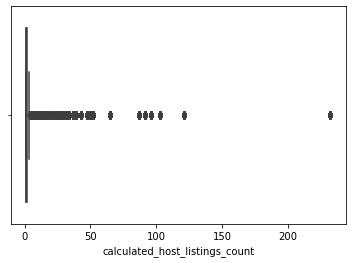

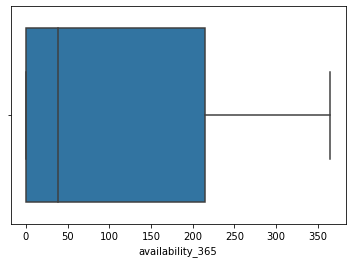

In [49]:
#Detecting Outliers through box plots for the ones which has IQR more than zero
for i in outlier_Ananlysis.columns:
    sns.boxplot(airbnb_data[i])
    plt.show()

In [53]:
airbnb_data.to_csv(r'C:\Swarna\Upgrad DS\Tableau\Case Study\AB_NYC_2019_processed.csv',index=False)